# Finding the right Estimator

In this notebook, we examine how different estimators perform in our prediction pipeline. First, we load the required dependencies and the data.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src import configuration as config
from src.pipeline.pipeline_factory import PipelineFactory, ModelType, EvaluationType

c:\users\thomas\appdata\local\programs\python\python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load the data
train_df = config.load_traindata_for_regression()
pipelineFactory = PipelineFactory()

# create the baseline pipeline
pipeline = pipelineFactory.create_pipeline(
    train_df,
    ModelType.REGRE_PREPROCESSED,
    verbose_level=1,
    evaluation=EvaluationType.BASIC
)

scores = {}

***
## 1) Evaluating Estimators

### 1.1) Baseline

In [3]:
from sklearn.dummy import DummyRegressor

pipeline.change_estimator(DummyRegressor())
pipeline.run()

scores['baseline'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.2206 [std=0.]
    validation_mae: 0.1783 [std=0.]
    validation_r2: -0.005 [std=0.]
    validation_average_spearman: 0. [std=0.]


### 1.2) Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression

pipeline.change_estimator(LinearRegression())
pipeline.run()

scores['linear_regression'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.1514 [std=0.]
    validation_mae: 0.1091 [std=0.]
    validation_r2: 0.5269 [std=0.]
    validation_average_spearman: 0.0893 [std=0.]


### 1.3) SVMs

In [5]:
from sklearn.svm import SVR

pipeline.change_estimator(SVR())
pipeline.run()

scores['svm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.1027 [std=0.]
    validation_mae: 0.078 [std=0.]
    validation_r2: 0.7824 [std=0.]
    validation_average_spearman: 0.1578 [std=0.]


### 1.4) K-Nearest-Neighbours

In [6]:
from sklearn.neighbors import KNeighborsRegressor

pipeline.change_estimator(KNeighborsRegressor())
pipeline.run()

scores['knn'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.1306 [std=0.]
    validation_mae: 0.0748 [std=0.]
    validation_r2: 0.6478 [std=0.]
    validation_average_spearman: 0.3984 [std=0.]


### 1.5) Decision Trees

In [7]:
from sklearn.tree import DecisionTreeRegressor

pipeline.change_estimator(DecisionTreeRegressor())
pipeline.run()

scores['decision_tree'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.0692 [std=0.]
    validation_mae: 0.0318 [std=0.]
    validation_r2: 0.901 [std=0.]
    validation_average_spearman: 0.5236 [std=0.]


### 1.6) Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestRegressor

pipeline.change_estimator(RandomForestRegressor())
pipeline.run()

scores['random_forest'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.0606 [std=0.]
    validation_mae: 0.0304 [std=0.]
    validation_r2: 0.9242 [std=0.]
    validation_average_spearman: 0.4964 [std=0.]


### 1.7) Light Gradient Boosting Machine

In [9]:
from lightgbm import LGBMRegressor

pipeline.change_estimator(LGBMRegressor())
pipeline.run()

scores['lgbm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.0635 [std=0.]
    validation_mae: 0.0405 [std=0.]
    validation_r2: 0.9168 [std=0.]
    validation_average_spearman: 0.2962 [std=0.]


### 1.8) Neural Networks

In [10]:
from sklearn.neural_network import MLPRegressor

pipeline.change_estimator(MLPRegressor())
pipeline.run()

scores['neural_network'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.0915 [std=0.]
    validation_mae: 0.0601 [std=0.]
    validation_r2: 0.8271 [std=0.]
    validation_average_spearman: 0.146 [std=0.]


***
## 2) Comparing Estimators

In [11]:
scores_df = pd.DataFrame(scores)
scores_df = scores_df.applymap(lambda x: x[0] if isinstance(x, list) else x)
scores_df.index = scores_df.index.str.replace('validation_', '')
scores_df = scores_df.rename_axis('metric')

display(scores_df)

,baseline,linear_regression,svm,knn,decision_tree,random_forest,lgbm,neural_network
metric,,,,,,,,
rmse,0.220645,0.151391,0.102661,0.130618,0.069237,0.060614,0.063502,0.091531
mae,0.178262,0.109132,0.077968,0.074751,0.031829,0.030397,0.040514,0.060057
r2,-0.004997,0.526872,0.782433,0.647806,0.901041,0.924156,0.916757,0.827053
average_spearman,0.000000,0.089321,0.157757,0.398352,0.523619,0.496358,0.296154,0.145982


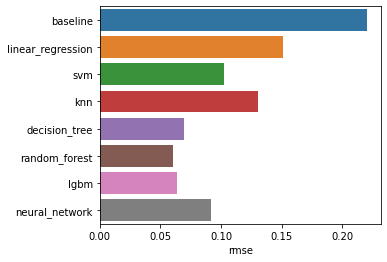

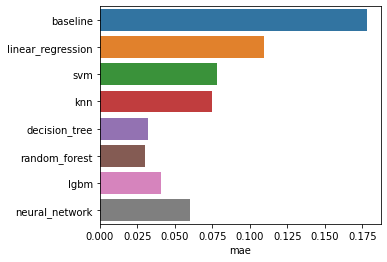

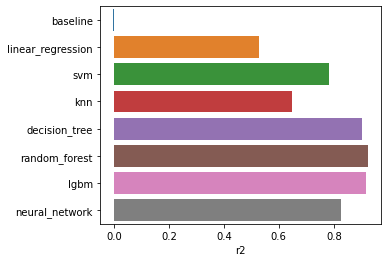

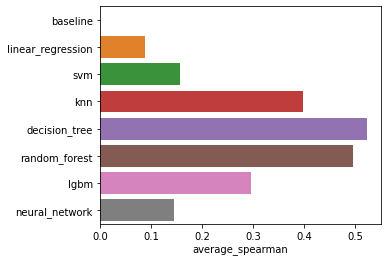

In [12]:
for metric, values in scores_df.iterrows():
    sns.barplot(x=values, y=values.index)
    plt.gcf().subplots_adjust(left=0.25)
    plt.savefig('no_tuning_' + metric + '.svg')
    plt.show()

In our evaluations, the decision tree performed the best regarding the average spearman correlation. Therefore, we will focus on this model in the tuning phase.

### Grid Search

Grid Search for LGBM-Regressor:

In [ ]:
# LGBM-Regressor
param_grid = {
    'estimator__learning_rate': [0.1, 0.01, 0.001],
    'estimator__n_estimators': [100, 200, 500],
    'estimator__max_depth': [3, 5, 7],
    'estimator__num_leaves': [31, 50, 100],
    'estimator__subsample': [0.8, 1.0],
    'estimator__colsample_bytree': [0.8, 1.0]
}

In [ ]:
# load the data
train_df = config.load_traindata_for_regression()
pipelineFactory = PipelineFactory()

# create the baseline pipeline
pipeline = pipelineFactory.create_pipeline(
    train_df,
    ModelType.REGRE_PREPROCESSED,
    verbose_level=1,
    evaluation=EvaluationType.GRID_SEARCH,
    param_grid=param_grid
)
pipeline.clear_steps()
pipeline.add_new_step(OneHotEncoder(), 'onehot')
pipeline.change_estimator(LGBMRegressor())

pipeline.run()
scores = {}

Evaluation metrics:
    best_score: 0.3675
    best_params: {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 500, 'estimator__max_depth': 7, 'estimator__num_leaves': 100, 'estimator__subsample': 0.8, 'estimator__colsample_bytree': 1.0}

Grid Search for DecisionTree Regressor:

In [ ]:
parameters={"estimator__splitter":["best","random"],
            "estimator__max_depth" : [1,3,5,7,9],
           "estimator__min_samples_leaf":[1,2,3,4,],
           "estimator__max_features":["auto","log2","sqrt",None],
           "estimator__max_leaf_nodes":[None,10,20,30,40] }

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# load the data
train_df = config.load_traindata_for_regression()
pipelineFactory = PipelineFactory()

# create the baseline pipeline
pipeline = pipelineFactory.create_pipeline(
    train_df,
    ModelType.REGRE_PREPROCESSED,
    verbose_level=1,
    evaluation=EvaluationType.GRID_SEARCH,
    param_grid=parameters
)
pipeline.clear_steps()
pipeline.add_new_step(OneHotEncoder(), 'onehot')
pipeline.change_estimator(DecisionTreeRegressor())

pipeline.run()
scores = {}